# 자연어처리(2)

> 학습내용
> 1.   사전작업
> 2.   텍스트 데이터 시각화
> 3.   영화 댓글 시각화





### 01) 사전 작업
  * 한글 폰트 적용, konloy 설치

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 74.4 MB/s 
     |████████████████████████████████| 86 kB 7.1 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
### 나눔 고딕 설치
!apt-get update -qq   # 설치를 업데이트 
!apt-get install fonts-nanum* -qq  # 설치한다. fonts-nanum*

#### 런타임 재기동후 , 다시시작

In [ ]:
import matplotlib.font_manager as fm # 폰트 관련 용도
import matplotlib.pyplot as plt      # 그래프 그리는 용도

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔 글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


In [ ]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False 

NanumGothic Eco


Text(0.5, 1.0, '시간별 가격 추이')

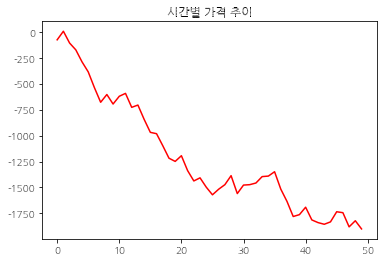

In [ ]:
# 데이터 준비
data = np.random.randint(-200, 100, 50).cumsum()

# 그래프를 그려 한글 확인
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')

In [ ]:
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Hannanum

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

### 02) 텍스트 데이터 시각화

In [ ]:
doc_ko = open("15_TheExtreme_utf8.txt").read()
doc_ko[1:1000]

'"x"\n"1" " 분노의 질주 시리즈중에서 제일 별루"\n"2" " 스케일 큰 시끄러운 액션이 난무하는데도 이렇게까지 지루할수 있다니....."\n"3" " 시~원 하게 잘 본 영화. 다음 시리즈에서는 여자 주인공의 비중이 더 높아졌으면 하는 바램!"\n"4" " 반지닦기, 자살닦이, 고무닦이, 정의닦이...로 이어지는 한심한 DC 시리즈 \n레지던트 이블 시리즈 \n그리고 이 영화 분노의 질주 시리즈 \n공통점은 시리즈가 거듭될수록 돈은 많이 들지만 재미는 없어지고 \nCG는 떡질되지만 실감나는 장면은 더 없어지도 뻔히 가짜라는게 드러나는 영화들 \n그러나\n아무리 엉터리로 만들고, 자국에서 망해도 \n미국 블록버스터라면 맹목적으로 보는 중국애들 땜에 \n아무리 쓰레기 영화라도 본전 건지는 것은 물론 상당히 많은 돈을 버니... \n이런 쓰레기들이 매년 양산된다. \n물론, 중국애들도 할말은 있을 거다 \n공산당이 검열하는 자국영화보다는 낫다고... \n하지만 우리들은 다른 전세계의 재미있는 영화를 볼 선택의 자유가 있쟎아! \n왜 이런 쓰레기 영화를 보는 거지?"\n"5" " "\n"6" " 그냥 액션만 보면 멋진데\n스토리는 주인공이 전여친한테 싸지른\n애새끼 구하러 간다며 아빠행세하면서\n그 덕분에 지동료들 다 버리고 미쳐 날뛰는 내용"\n"7" " "\n"8" " 아래는 다들 평점 알바들인가부네.. 이런 개 쓰레기 영화가 평점이 이리 높다니"\n"9" " "\n"10" " "\n"11" " "\n"12" " "\n"13" " "\n"14" " "\n"15" " 스케일은 점점 더 커지지만, 액션은 멍청할정도로 어이가없음 과유불급"\n"16" " 이 시리즈로 이렇게 길게 간다는게 신기.. 새로울 건 없지만 달리는 걸 좋아하시는 분이라면 "\n"17" " "\n"18" " "\n"19" " "\n"20" " 대머리들은 TV물로 찍고,\n감독은 CG실에서 이어붙히고."\n"21" " "\n"22" " "\n"23" " "\n"24" " "\n"25" " 

In [ ]:
from konlpy.tag import Okt
t = Okt()

In [ ]:
doc_nouns = t.nouns(doc_ko)
print(len(doc_nouns))
doc_nouns

4286


['분노',
 '질주',
 '시리즈',
 '제일',
 '별루',
 '스케일',
 '액션',
 '난무',
 '시',
 '원',
 '영화',
 '다음',
 '시리즈',
 '여자',
 '주인공',
 '비중',
 '더',
 '바램',
 '반지',
 '자살',
 '고무',
 '정의',
 '로',
 '시리즈',
 '레지던트',
 '이블',
 '시리즈',
 '이',
 '영화',
 '분노',
 '질주',
 '시리즈',
 '공통점',
 '시리즈',
 '거듭',
 '돈',
 '재미',
 '떡질',
 '실감',
 '나',
 '장면',
 '더',
 '가짜',
 '게',
 '영화',
 '엉터리',
 '자국',
 '미국',
 '블록버스터',
 '라면',
 '맹목',
 '중국',
 '애',
 '땜',
 '쓰레기',
 '영화',
 '본전',
 '것',
 '돈',
 '버니',
 '쓰레기',
 '매년',
 '양산',
 '중국',
 '애',
 '거',
 '공산당',
 '검열',
 '자국',
 '영화',
 '낫다',
 '우리',
 '다른',
 '전세계',
 '영화',
 '볼',
 '선택',
 '자유',
 '있쟎',
 '왜',
 '쓰레기',
 '영화',
 '거지',
 '그냥',
 '액션',
 '스토리',
 '주인공',
 '전여친',
 '애',
 '새끼',
 '구',
 '간다',
 '아빠',
 '행세',
 '그',
 '덕분',
 '동료',
 '내용',
 '아래',
 '평점',
 '알바',
 '개',
 '쓰레기',
 '영화',
 '평점',
 '스케일',
 '점점',
 '더',
 '액션',
 '정도',
 '어이',
 '과유',
 '불급',
 '이',
 '시리즈',
 '신기',
 '건',
 '걸',
 '대머리',
 '물',
 '감독',
 '실',
 '이제',
 '제목',
 '분노',
 '질주',
 '해도',
 '전형',
 '헐리우드',
 '액션',
 '물',
 '생각',
 '영화',
 '노잼',
 '노',
 '볼거리',
 '평점',
 '시리즈',
 '편',
 '질질',
 '루즈',
 '분노',
 '질주'

In [ ]:
import nltk

In [ ]:
ko = nltk.Text(doc_nouns, name = '분노의 질주')    # doc_nouns : 그냥 단어 리스트
type(ko)

nltk.text.Text

In [ ]:
print( len(ko.tokens), type(ko.tokens)  )
print( ko.tokens[0:30]  )                #해당되는 문장안의 단어들의 리스트
print( ko.vocab().most_common(20)  ) # 최다 빈출 단어 20개

4286 <class 'list'>
['분노', '질주', '시리즈', '제일', '별루', '스케일', '액션', '난무', '시', '원', '영화', '다음', '시리즈', '여자', '주인공', '비중', '더', '바램', '반지', '자살', '고무', '정의', '로', '시리즈', '레지던트', '이블', '시리즈', '이', '영화', '분노']
[('영화', 157), ('액션', 149), ('시리즈', 70), ('분노', 62), ('스토리', 57), ('질주', 55), ('최고', 44), ('자동차', 40), ('생각', 37), ('편', 37), ('더', 36), ('그냥', 33), ('역시', 32), ('좀', 31), ('폴', 31), ('워커', 30), ('그', 28), ('장면', 26), ('이', 25), ('것', 25)]


In [ ]:
most_fre = ko.vocab().most_common(50)
most_fre

[('영화', 157),
 ('액션', 149),
 ('시리즈', 70),
 ('분노', 62),
 ('스토리', 57),
 ('질주', 55),
 ('최고', 44),
 ('자동차', 40),
 ('생각', 37),
 ('편', 37),
 ('더', 36),
 ('그냥', 33),
 ('역시', 32),
 ('좀', 31),
 ('폴', 31),
 ('워커', 30),
 ('그', 28),
 ('장면', 26),
 ('이', 25),
 ('것', 25),
 ('가족', 24),
 ('점', 24),
 ('기대', 24),
 ('재미', 23),
 ('내용', 23),
 ('볼', 22),
 ('시간', 22),
 ('보고', 22),
 ('스케일', 21),
 ('진짜', 21),
 ('이번', 21),
 ('볼거리', 20),
 ('정말', 20),
 ('마지막', 19),
 ('액션영화', 19),
 ('돈', 18),
 ('이제', 18),
 ('또', 18),
 ('분노의질주', 17),
 ('사람', 16),
 ('다음', 15),
 ('평점', 15),
 ('정도', 15),
 ('대박', 15),
 ('말', 15),
 ('때', 15),
 ('중간', 15),
 ('전편', 15),
 ('눈', 14),
 ('스트레스', 14)]

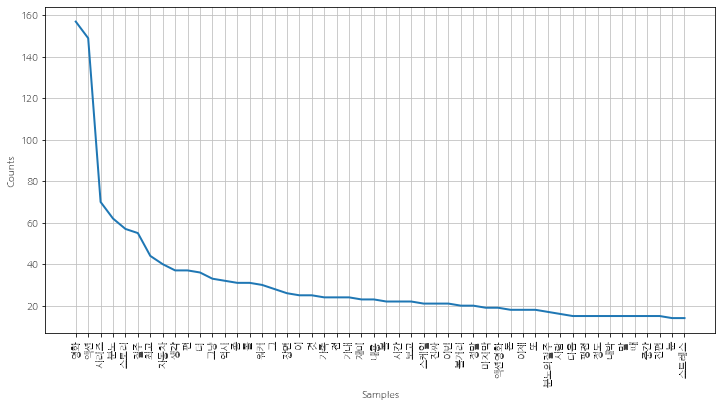

In [ ]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [ ]:
# 불용어 처리
stopwords = ['이','것', '점', '영화', '볼']

new_ko = []
for one_word in ko:
  if one_word not in stopwords:
    new_ko.append(one_word)

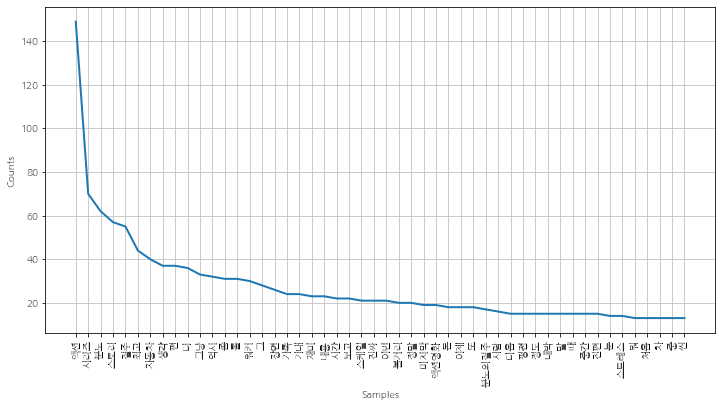

In [ ]:
new_ko = nltk.Text(new_ko, name='분노의 질주2')
plt.figure(figsize=(12,6))
new_ko.plot(50)

In [ ]:
plt.figure(figsize=(15,8))
new_ko

<Text: 분노의 질주2>

<Figure size 1080x576 with 0 Axes>

In [ ]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [ ]:
Car_mask = np.array(Image.open("Draw_car1.png"))

In [ ]:
data = new_ko.vocab().most_common(1000)

In [ ]:
path

'/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

In [ ]:
wc = WordCloud(max_words=100, # 수가 커질수로 빼곡해짐
               mask = Car_mask,
               background_color = 'white',
               contour_width = 3,
               contour_color = 'steelblue',
               font_path = path).generate_from_frequencies(dict(data))

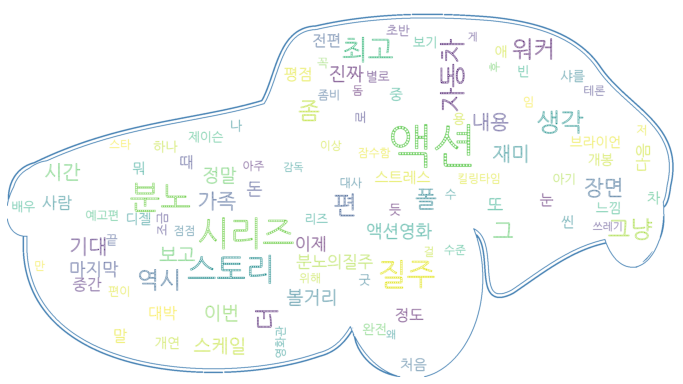

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()